## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

pd.set_option('display.max_columns', 500)

Блокнот выполнялся Google Colab, поэтому импортируем Google Drive:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Прочитаем наш файл с исходными данными:

In [3]:
DATA_PATH = os.path.abspath("/content/drive/MyDrive/data/project_5/data")
DATA_PATH

'/content/drive/MyDrive/data/project_5/data'

In [4]:
PROCESSED_DATA_PATH = os.path.join(DATA_PATH, "processed_data")
PROCESSED_DATA_PATH

'/content/drive/MyDrive/data/project_5/data/processed_data'

In [5]:
taxi_data = pd.read_csv(f"{DATA_PATH}/train_pr_5.csv")
print("Train data shape: {}".format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [6]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные. **ОТВЕТ**: от 2016-01-01 до 2016-06-30

In [7]:
taxi_data["pickup_datetime"] = pd.to_datetime(
    taxi_data["pickup_datetime"], 
    format="%Y-%m-%d %H:%M:%S"
)

taxi_data["dropoff_datetime"] = pd.to_datetime(
    taxi_data["dropoff_datetime"],
    format="%Y-%m-%d %H:%M:%S"
)

In [8]:
display(taxi_data[["pickup_datetime", "dropoff_datetime"]])
display(taxi_data[["pickup_datetime", "dropoff_datetime"]].info())

pickup_datetime    dropoff_datetime
0       2016-03-14 17:24:55 2016-03-14 17:32:30
1       2016-06-12 00:43:35 2016-06-12 00:54:38
2       2016-01-19 11:35:24 2016-01-19 12:10:48
3       2016-04-06 19:32:31 2016-04-06 19:39:40
4       2016-03-26 13:30:55 2016-03-26 13:38:10
...                     ...                 ...
1458639 2016-04-08 13:31:04 2016-04-08 13:44:02
1458640 2016-01-10 07:35:15 2016-01-10 07:46:10
1458641 2016-04-22 06:57:41 2016-04-22 07:10:25
1458642 2016-01-05 15:56:26 2016-01-05 16:02:39
1458643 2016-04-05 14:44:25 2016-04-05 14:47:43

[1458644 rows x 2 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 2 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   pickup_datetime   1458644 non-null  datetime64[ns]
 1   dropoff_datetime  1458644 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 22.3 MB


None

In [9]:
taxi_data["pickup_datetime"].min()

Timestamp('2016-01-01 00:00:17')

In [10]:
taxi_data["pickup_datetime"].max()

Timestamp('2016-06-30 23:59:39')

### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [11]:
taxi_data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

**ОТВЕТ**: Пропусков данных нет ни в одном столбце

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных? **ОТВЕТ**: 2

б) Каково максимальное количество пассажиров? **ОТВЕТ**: 9

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого. **ОТВЕТ**: mean == 959, median == 662

г) Чему равно минимальное и максимальное время поездки (в секундах)? **ОТВЕТ**: min == 1, max == 662


In [12]:
print(f'Число уникальных таксопарков: {taxi_data["vendor_id"].nunique()}')

Число уникальных таксопарков: 2


In [13]:
display(taxi_data.describe().iloc[1:].applymap(lambda x: f"{x:0.2f}"))

vendor_id passenger_count pickup_longitude pickup_latitude  \
mean      1.53            1.66           -73.97           40.75   
std       0.50            1.31             0.07            0.03   
min       1.00            0.00          -121.93           34.36   
25%       1.00            1.00           -73.99           40.74   
50%       2.00            1.00           -73.98           40.75   
75%       2.00            2.00           -73.97           40.77   
max       2.00            9.00           -61.34           51.88   

     dropoff_longitude dropoff_latitude trip_duration  
mean            -73.97            40.75        959.49  
std               0.07             0.04       5237.43  
min            -121.93            32.18          1.00  
25%             -73.99            40.74        397.00  
50%             -73.98            40.75        662.00  
75%             -73.96            40.77       1075.00  
max             -61.34            43.92    3526282.00

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу? **ОТВЕТ**: 220868

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого **ОТВЕТ**: 8015

In [14]:
def add_datetime_features(df: pd.DataFrame) -> pd.DataFrame:
    df["pickup_date"] = df["pickup_datetime"].dt.date
    df["pickup_hour"] = df["pickup_datetime"].dt.hour
    df["pickup_day_of_week"] = df["pickup_datetime"].dt.day_name()
    return df

In [15]:
taxi_data = add_datetime_features(taxi_data)
taxi_data.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_date  \
0         40.765602                  N            455  2016-03-14   
1         40.731152                  N            663  2016-06-12   
2         40.710087                  N           2124  2016-01-19   
3         40.706718                  N            429  2016-04-06   
4         40.782520                  N            435  2016-03-26   

   pickup_hour pickup_day_of_week  
0           17             Monday  
1            0             Sunday  
2           11            Tuesday  
3           19          Wednesday  
4           13           Saturday

In [16]:
print("Среднее число поездок в день: ", end="")
int(round(taxi_data["pickup_date"].value_counts().mean(), 0))

Среднее число поездок в день: 

8015

In [17]:
taxi_data["pickup_day_of_week"].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day_of_week, dtype: int64

### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого. **Ответ**: 585


In [18]:
holiday_data = pd.read_csv(f"{DATA_PATH}/holiday_data.csv", sep=";")
holiday_data

day        date                     holiday
0     Friday  2016-01-01               New Years Day
1     Monday  2016-01-18  Martin Luther King Jr. Day
2     Friday  2016-02-12          Lincoln's Birthday
3     Monday  2016-02-15             Presidents' Day
4     Sunday  2016-05-08                Mother's Day
5     Monday  2016-05-30                Memorial Day
6     Sunday  2016-06-19                Father's Day
7     Monday  2016-07-04            Independence Day
8     Monday  2016-09-05                   Labor Day
9     Monday  2016-10-10                Columbus Day
10    Friday  2016-11-11                Veterans Day
11  Thursday  2016-11-24                Thanksgiving
12    Monday  2016-12-26     Christmas Day (in lieu)
13   Tuesday  2016-11-08                Election Day

In [19]:
def add_holiday_features(
    df_in: pd.DataFrame,
    df_holiday: pd.DataFrame,
) -> pd.DataFrame:
    holiday_dates = list(map(
        lambda x: pd.Timestamp(x), 
        holiday_data["date"].values
    ))
    df_in["pickup_holiday"] = df_in["pickup_date"].apply(
        lambda x: 1 if pd.Timestamp(x) in holiday_dates else 0
    )
    return df_in

In [20]:
taxi_data = add_holiday_features(taxi_data, holiday_data)
taxi_data.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_date  \
0         40.765602                  N            455  2016-03-14   
1         40.731152                  N            663  2016-06-12   
2         40.710087                  N           2124  2016-01-19   
3         40.706718                  N            429  2016-04-06   
4         40.782520                  N            435  2016-03-26   

   pickup_hour pickup_day_of_week  pickup_holiday  
0           17             Monday               0  
1            0             Sunday               0  
2           11            Tuesday               0  
3           19          Wednesday               0  
4           13           Saturday               0

In [21]:
taxi_data["pickup_holiday"].value_counts()

0    1407522
1      51122
Name: pickup_holiday, dtype: int64

In [22]:
print("Длительность поездки на такси в праздничные дни (сек): ", end="")
int(taxi_data[taxi_data["pickup_holiday"] == 1]["trip_duration"].median())

Длительность поездки на такси в праздничные дни (сек): 

585

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? **ОТВЕТ**: 372.5

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц? **ОТВЕТ**: 1

In [23]:
osrm_data = pd.read_csv(f"{DATA_PATH}/osrm_data_train.csv")
osrm_data.head()


id   starting_street              end_street  total_distance  \
0  id2875421   Columbus Circle        East 65th Street          2009.1   
1  id2377394        2nd Avenue  Washington Square West          2513.2   
2  id3504673  Greenwich Street                Broadway          1779.4   
3  id2181028          Broadway        West 81st Street          1614.9   
4  id0801584  Lexington Avenue        West 31st Street          1393.5   

   total_travel_time  number_of_steps  \
0              164.9                5   
1              332.0                6   
2              235.8                4   
3              140.1                5   
4              189.4                5   

                                street_for_each_step  \
0  Columbus Circle|Central Park West|65th Street ...   
1  2nd Avenue|East 13th Street|5th Avenue|Washing...   
2      Greenwich Street|Park Place|Broadway|Broadway   
3  Broadway|West 86th Street|Columbus Avenue|West...   
4  Lexington Avenue|East 27th Street|Madison Aven...   

                 distance_per_step        travel_time_per_step  \
0            0|576.4|885.6|547.1|0          0|61.1|60.1|43.7|0   
1  877.3|836.5|496.1|164.2|139.1|0  111.7|109|69.9|25.8|15.6|0   
2              644.2|379.9|755.3|0           80.5|50.8|104.5|0   
3          617|427.4|412.2|158.3|0           56|36|37.8|10.3|0   
4         18.9|311.9|313.3|749.4|0        6.3|42.9|48.4|91.8|0   

                                 step_maneuvers  \
0            depart|rotary|turn|new name|arrive   
1  depart|turn|turn|end of road|continue|arrive   
2                depart|turn|end of road|arrive   
3                  depart|turn|turn|turn|arrive   
4                  depart|turn|turn|turn|arrive   

                        step_direction  \
0  left|straight|right|straight|arrive   
1    none|right|left|right|left|arrive   
2               left|left|right|arrive   
3         right|left|right|left|arrive   
4        right|right|right|left|arrive   

                                  step_location_list  
0  -73.982316,40.767869|-73.981997,40.767688|-73....  
1  -73.980429,40.73857|-73.985444,40.731658|-73.9...  
2  -74.010145,40.719982|-74.011527,40.714294|-74....  
3  -73.972998,40.793187|-73.976607,40.788361|-73....  
4  -73.982805,40.742173|-73.982914,40.742024|-73....

In [24]:
osrm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458643 entries, 0 to 1458642
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1458643 non-null  object 
 1   starting_street       1458643 non-null  object 
 2   end_street            1458643 non-null  object 
 3   total_distance        1458643 non-null  float64
 4   total_travel_time     1458643 non-null  float64
 5   number_of_steps       1458643 non-null  int64  
 6   street_for_each_step  1458643 non-null  object 
 7   distance_per_step     1458643 non-null  object 
 8   travel_time_per_step  1458643 non-null  object 
 9   step_maneuvers        1458643 non-null  object 
 10  step_direction        1458643 non-null  object 
 11  step_location_list    1458643 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 133.5+ MB


In [25]:
def add_osrm_features(
    df_in: pd.DataFrame,
    df_osrm: pd.DataFrame,
) -> pd.DataFrame:
    df_result = pd.merge(
        left=df_in,
        right=df_osrm[[
            "id", 
            "total_distance", 
            "total_travel_time",
            "number_of_steps"
        ]],
        how="left",
        on="id"
    )
    return df_result

In [26]:
taxi_data = add_osrm_features(taxi_data, osrm_data)
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

Видим только одно пропущенное значение.

In [27]:
print((
    "Разница (в секундах) между медианной длительностью поездки\n"
    "в данных и медианной длительностью поездки, полученной из OSRM равна "
), end="")
taxi_data["trip_duration"].median() - taxi_data["total_travel_time"].median()

Разница (в секундах) между медианной длительностью поездки
в данных и медианной длительностью поездки, полученной из OSRM равна 

372.5

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых. **ОТВЕТ**: 2.09


In [28]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

In [29]:
def add_geographical_features(
    df_in: pd.DataFrame
) -> pd.DataFrame:
    df_in["haversine_distance"] = get_haversine_distance(
        df_in["pickup_latitude"],
        df_in["pickup_longitude"],
        df_in["dropoff_latitude"],
        df_in["dropoff_longitude"]
    )
    df_in["direction"] = get_angle_direction(
        df_in["pickup_latitude"],
        df_in["pickup_longitude"],
        df_in["dropoff_latitude"],
        df_in["dropoff_longitude"]
    )
    return df_in

In [30]:
taxi_data = add_geographical_features(taxi_data)
taxi_data.head(3)

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_date  \
0         40.765602                  N            455  2016-03-14   
1         40.731152                  N            663  2016-06-12   
2         40.710087                  N           2124  2016-01-19   

   pickup_hour pickup_day_of_week  pickup_holiday  total_distance  \
0           17             Monday               0          2009.1   
1            0             Sunday               0          2513.2   
2           11            Tuesday               0         11060.8   

   total_travel_time  number_of_steps  haversine_distance   direction  
0              164.9              5.0            1.498521   99.970196  
1              332.0              6.0            1.805507 -117.153768  
2              767.6             16.0            6.385098 -159.680165

In [31]:
print("Медианное расстояние Хаверсина поездок (в киллометрах) = ", end="")
round(taxi_data["haversine_distance"].median(), 2)

Медианное расстояние Хаверсина поездок (в киллометрах) = 

2.09

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [32]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [33]:
# ваш код здесь
def add_cluster_features(
    df_in: pd.DataFrame,
    model: cluster.KMeans
) -> pd.DataFrame:
    coords = np.hstack((
        df_in[['pickup_latitude', 'pickup_longitude']],
        df_in[['dropoff_latitude', 'dropoff_longitude']]
    ))
    df_in["geo_cluster"] = model.predict(coords)
    return df_in

In [34]:
taxi_data = add_cluster_features(taxi_data, kmeans)
taxi_data.head(3)

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_date  \
0         40.765602                  N            455  2016-03-14   
1         40.731152                  N            663  2016-06-12   
2         40.710087                  N           2124  2016-01-19   

   pickup_hour pickup_day_of_week  pickup_holiday  total_distance  \
0           17             Monday               0          2009.1   
1            0             Sunday               0          2513.2   
2           11            Tuesday               0         11060.8   

   total_travel_time  number_of_steps  haversine_distance   direction  \
0              164.9              5.0            1.498521   99.970196   
1              332.0              6.0            1.805507 -117.153768   
2              767.6             16.0            6.385098 -159.680165   

   geo_cluster  
0            9  
1            4  
2            4

In [35]:
taxi_data["geo_cluster"].value_counts()

0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: geo_cluster, dtype: int64

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду? **ОТВЕТ**: 12032

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента. **ОТВЕТ**: 0.82


In [36]:
weather_data = pd.read_csv(f"{DATA_PATH}/weather_data.csv")
weather_data["time"] = pd.to_datetime(
    weather_data["time"], 
    format="%Y-%m-%d %H:%M:%S"
)
weather_data["date"] = weather_data["time"].dt.date
weather_data["hour"] = weather_data["time"].dt.hour
weather_data
# ваш код здесь

time  temperature  windchill  heat index  humidity  \
0    2015-12-31 02:00:00          7.8        7.1         NaN      0.89   
1    2015-12-31 03:00:00          7.2        5.9         NaN      0.90   
2    2015-12-31 04:00:00          7.2        NaN         NaN      0.90   
3    2015-12-31 05:00:00          7.2        5.9         NaN      0.86   
4    2015-12-31 06:00:00          7.2        6.4         NaN      0.90   
...                  ...          ...        ...         ...       ...   
8782 2017-01-01 21:00:00          5.0        3.3         NaN      0.43   
8783 2017-01-01 22:00:00          5.6        3.6         NaN      0.38   
8784 2017-01-01 23:00:00          5.6        4.0         NaN      0.38   
8785 2017-01-02 00:00:00          5.0        3.3         NaN      0.41   
8786 2017-01-02 01:00:00          5.0        2.1         NaN      0.43   

      pressure  dew Point  visibility  wind dir  wind speed  gust speed  \
0       1017.0        6.1         8.0       NNE         5.6         0.0   
1       1016.5        5.6        12.9  Variable         7.4         0.0   
2       1016.7        5.6        12.9      Calm         0.0         0.0   
3       1015.9        5.0        14.5        NW         7.4         0.0   
4       1016.2        5.6        11.3      West         5.6         0.0   
...        ...        ...         ...       ...         ...         ...   
8782    1028.5       -6.7        16.1       ENE         7.4         0.0   
8783    1029.3       -7.8        16.1        NE         9.3         0.0   
8784    1030.2       -7.8        16.1        NE         7.4         0.0   
8785    1030.6       -7.2        16.1       ENE         7.4         0.0   
8786    1030.1       -6.7        16.1       ENE        13.0         0.0   

      precip events conditions        date  hour  
0        0.8   None   Overcast  2015-12-31     2  
1        0.3   None   Overcast  2015-12-31     3  
2        0.0   None   Overcast  2015-12-31     4  
3        0.0   None   Overcast  2015-12-31     5  
4        0.0   None   Overcast  2015-12-31     6  
...      ...    ...        ...         ...   ...  
8782     0.0   None      Clear  2017-01-01    21  
8783     0.0   None      Clear  2017-01-01    22  
8784     0.0   None      Clear  2017-01-01    23  
8785     0.0   None      Clear  2017-01-02     0  
8786     0.0   None      Clear  2017-01-02     1  

[8787 rows x 16 columns]

In [37]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         8787 non-null   datetime64[ns]
 1   temperature  8787 non-null   float64       
 2   windchill    2295 non-null   float64       
 3   heat index   815 non-null    float64       
 4   humidity     8787 non-null   float64       
 5   pressure     8556 non-null   float64       
 6   dew Point    8787 non-null   float64       
 7   visibility   8787 non-null   float64       
 8   wind dir     8787 non-null   object        
 9   wind speed   8787 non-null   float64       
 10  gust speed   8787 non-null   float64       
 11  precip       8787 non-null   float64       
 12  events       8787 non-null   object        
 13  conditions   8787 non-null   object        
 14  date         8787 non-null   object        
 15  hour         8787 non-null   int64         
dtypes: dat

In [38]:
weather_data["events"].value_counts()

None    8332
Rain     379
Snow      74
Fog        2
Name: events, dtype: int64

In [39]:
def add_weather_features(
    df_in: pd.DataFrame,
    df_weather: pd.DataFrame
) -> pd.DataFrame:
    df_result = pd.merge(
        left=df_in,
        right=df_weather[[
            "temperature",
            "visibility",
            "wind speed",
            "precip",
            "events",
            "date",
            "hour"
        ]],
        how="left",
        left_on=["pickup_date", "pickup_hour"],
        right_on=["date", "hour"]
    )
    return df_result


In [40]:
taxi_data = add_weather_features(taxi_data, weather_data)
taxi_data.drop(["date", "hour"], axis=1, inplace=True)
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

In [41]:
print(
    "Число поездок в снежную погоду: "
    f'{taxi_data[taxi_data["events"] == "Snow"].shape[0]}'
)

Число поездок в снежную погоду: 13126


In [42]:
nan_percent = round(taxi_data.isna().sum()[-1] / taxi_data.shape[0] * 100, 2)
print(f"Процент пропущенных значений погоды: {nan_percent}%")

Процент пропущенных значений погоды: 0.82%


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [43]:
def fill_null_weather_data(df_in: pd.DataFrame) -> pd.DataFrame:
    for col in ["temperature", "visibility", "wind speed", "precip"]:
        df_in[col] = df_in[col].fillna(
        df_in.groupby("pickup_date")[col].transform("median")
        )
    df_in["events"] = df_in["events"].fillna(
        "None"
    )
    return df_in

In [44]:
taxi_data = fill_null_weather_data(taxi_data)
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

In [45]:
print(
    'Медианная температура после заполнения ' 
    f'пропусков: {taxi_data["temperature"].median()}'
)

Медианная температура после заполнения пропусков: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


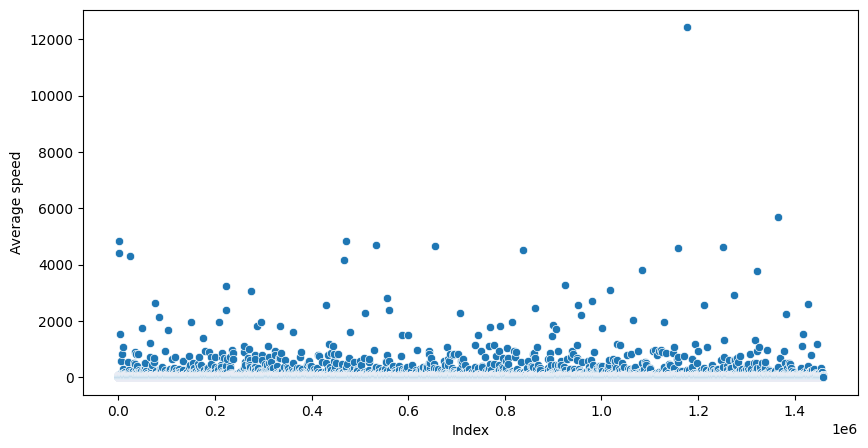

In [46]:
avg_speed = taxi_data["total_distance"] / taxi_data["trip_duration"] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel("Index")
ax.set_ylabel("Average speed");

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?  **ОТВЕТ**: 4

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти? **ОТВЕТ**: 407 (у меня получилось 406 потому, что в признаке средней скорости есть один пропуск)

In [47]:
print(
    "Число поездок с длительностью больше 24 часов: "
    f'{(taxi_data["trip_duration"] > 24 * 60 * 60).sum()}'
)

Число поездок с длительностью больше 24 часов: 4


In [48]:
taxi_data = taxi_data.drop(
    taxi_data[taxi_data["trip_duration"] > 24 * 60 * 60].index
)

In [49]:
print(f"Размерность после удаления выбросов по времени: {taxi_data.shape}")

Размерность после удаления выбросов по времени: (1458640, 26)


In [50]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
taxi_data["avg_speed"] = avg_speed
print(
    "Число выбросов по скорости: "
    f'{taxi_data[taxi_data["avg_speed"] >= 300].shape[0]}'
)
taxi_data = taxi_data.drop(
    taxi_data[taxi_data["avg_speed"] >= 300].index
)
taxi_data.info()

Число выбросов по скорости: 406
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458234 entries, 0 to 1458643
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458234 non-null  object        
 1   vendor_id           1458234 non-null  int64         
 2   pickup_datetime     1458234 non-null  datetime64[ns]
 3   dropoff_datetime    1458234 non-null  datetime64[ns]
 4   passenger_count     1458234 non-null  int64         
 5   pickup_longitude    1458234 non-null  float64       
 6   pickup_latitude     1458234 non-null  float64       
 7   dropoff_longitude   1458234 non-null  float64       
 8   dropoff_latitude    1458234 non-null  float64       
 9   store_and_fwd_flag  1458234 non-null  object        
 10  trip_duration       1458234 non-null  int64         
 11  pickup_date         1458234 non-null  object        
 12  pickup_hour         1458234 non-null  

In [51]:
taxi_data.dropna(inplace=True)
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458233 entries, 0 to 1458643
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458233 non-null  object        
 1   vendor_id           1458233 non-null  int64         
 2   pickup_datetime     1458233 non-null  datetime64[ns]
 3   dropoff_datetime    1458233 non-null  datetime64[ns]
 4   passenger_count     1458233 non-null  int64         
 5   pickup_longitude    1458233 non-null  float64       
 6   pickup_latitude     1458233 non-null  float64       
 7   dropoff_longitude   1458233 non-null  float64       
 8   dropoff_latitude    1458233 non-null  float64       
 9   store_and_fwd_flag  1458233 non-null  object        
 10  trip_duration       1458233 non-null  int64         
 11  pickup_date         1458233 non-null  object        
 12  pickup_hour         1458233 non-null  int64         
 13  pickup_day_o

In [52]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration'] + 1)

## 3. Разведывательный анализ данных (EDA)

In [53]:
import scipy

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [54]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых. **ОТВЕТ**: 0

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным? **ОТВЕТ**: хотя и распределение очень похоже на нормальное, но согласно тесту таковым не является.

p = 0
The null hypothesis can be rejected


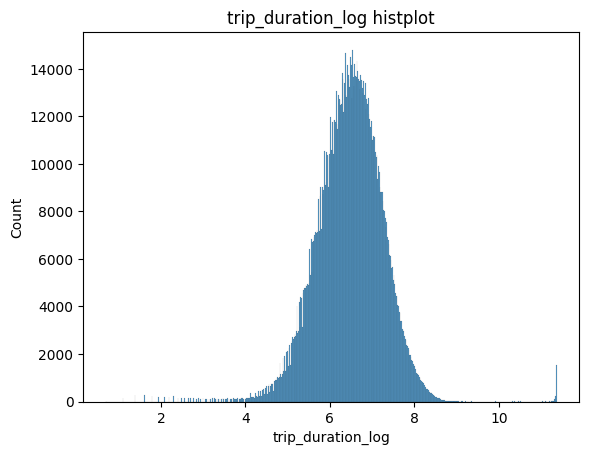

In [55]:
# ваш код здесь
k2, p = scipy.stats.normaltest(taxi_data['trip_duration_log'])
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
plt.title("trip_duration_log histplot")
sns.histplot(taxi_data['trip_duration_log']);

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

**ОТВЕТ**: Распределения в группах практически не отличаются, признак vendor_id не имеет значения при определении длительности поездки.

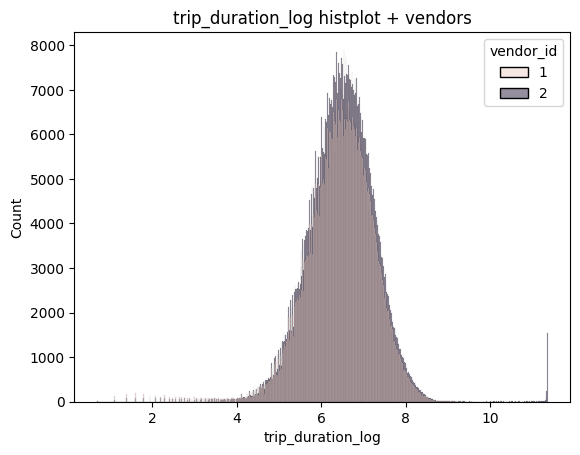

In [56]:
# ваш код здесь
plt.title("trip_duration_log histplot + vendors")
sns.histplot(
    data=taxi_data,
    x="trip_duration_log",
    hue="vendor_id"
);

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

**ОТВЕТ**: Распределения в группах значительно отличаются, признак store_and_fwd_flag имеет значение при определении длительности поездки.

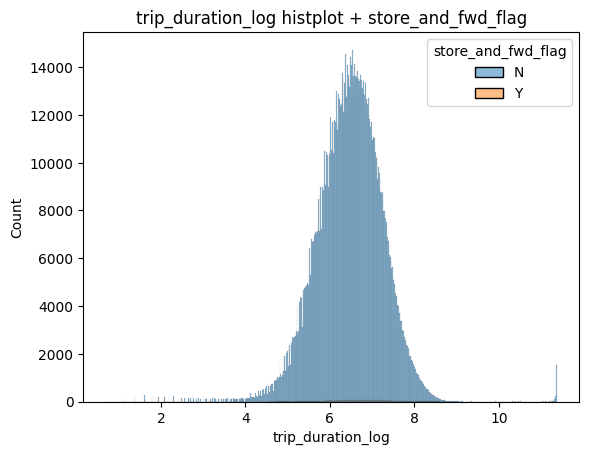

In [57]:
# ваш код здесь
plt.title("trip_duration_log histplot + store_and_fwd_flag")
sns.histplot(
    data=taxi_data,
    x="trip_duration_log",
    hue="store_and_fwd_flag"
);

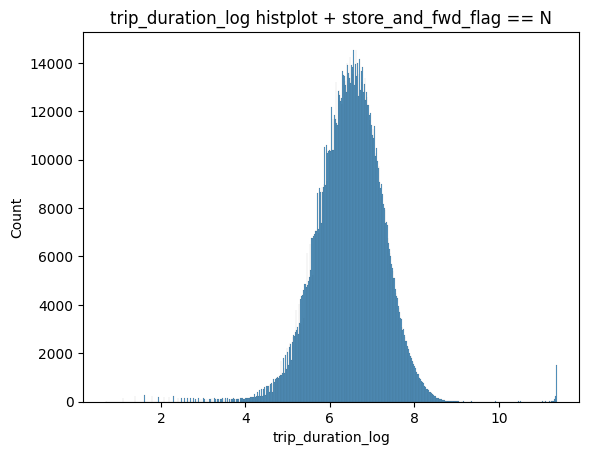

In [58]:
plt.title("trip_duration_log histplot + store_and_fwd_flag == N")
sns.histplot(
    taxi_data["trip_duration_log"][taxi_data["store_and_fwd_flag"] == "N"]
);

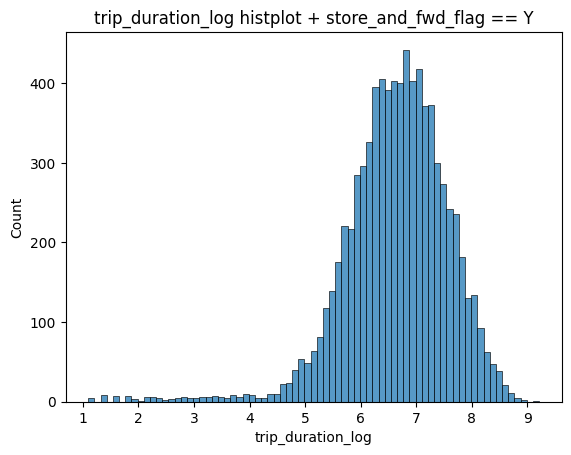

In [59]:
plt.title("trip_duration_log histplot + store_and_fwd_flag == Y")
sns.histplot(
    taxi_data["trip_duration_log"][taxi_data["store_and_fwd_flag"] == "Y"]
);

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего? **ОТВЕТ**: с 00:00 по 5:00

б) В какое время суток наблюдается пик медианной длительности поездок? **ОТВЕТ**: с 13:00 по 18:00

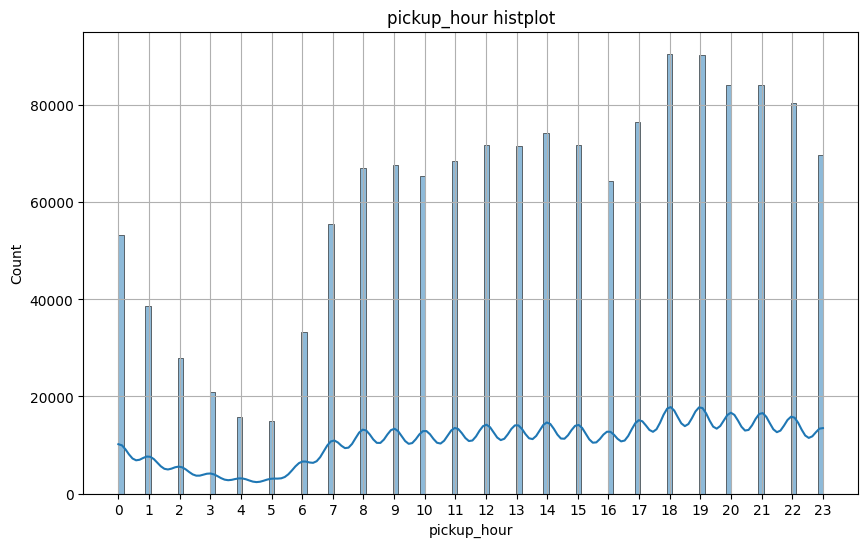

In [60]:
# ваш код здесь
plt.figure(figsize=(10, 6))
plt.title("pickup_hour histplot")
plt.xticks(range(24))
plt.grid()
sns.histplot(
    taxi_data["pickup_hour"],
    kde=True
);

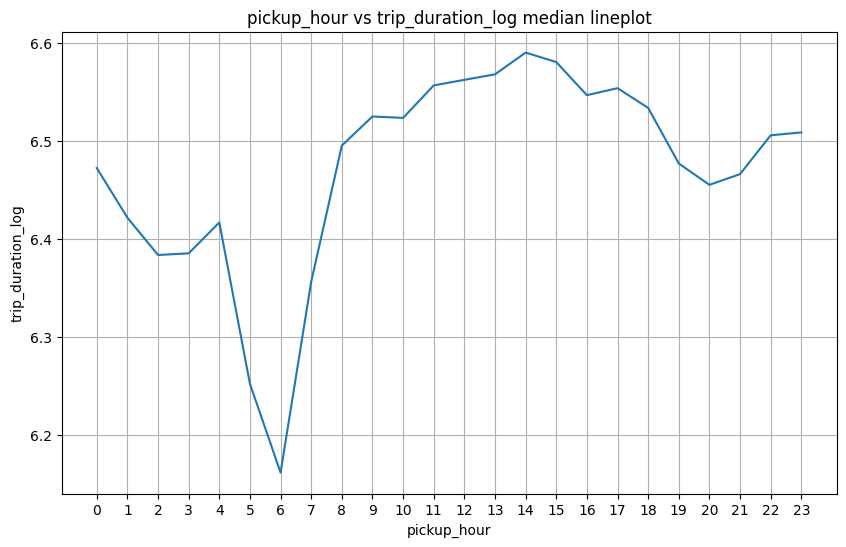

In [61]:
plt.figure(figsize=(10, 6))
plt.title("pickup_hour vs trip_duration_log median lineplot")
plt.xticks(range(24))
plt.grid()
sns.lineplot(
    taxi_data.groupby("pickup_hour")["trip_duration_log"].agg("median"),
);

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:

а) В какой день недели совершается больше всего поездок? **ОТВЕТ**: Пятница (Friday)

б) В какой день недели медианная длительность поездок наименьшая? **ОТВЕТ**: Воскресенье (Sunday)


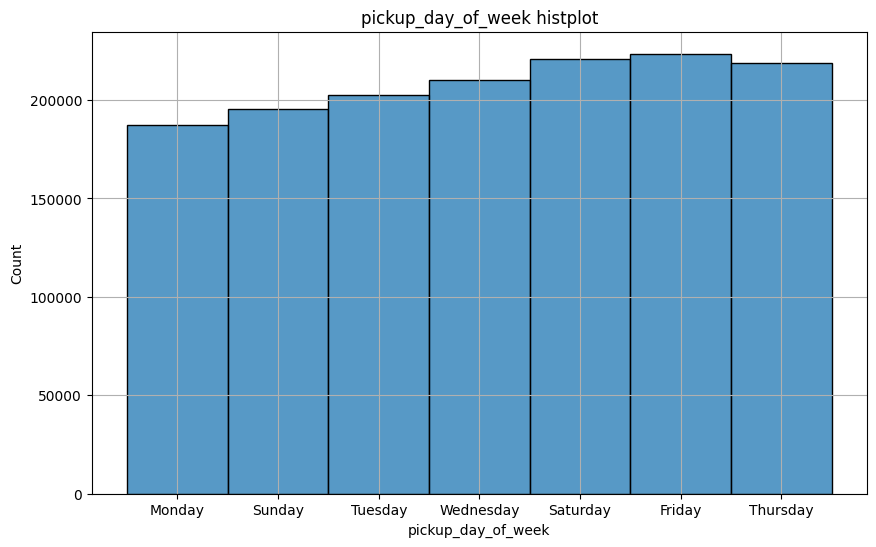

In [62]:
# ваш код здесь
plt.figure(figsize=(10, 6))
plt.title("pickup_day_of_week histplot")
plt.grid()
sns.histplot(
    taxi_data["pickup_day_of_week"]
);

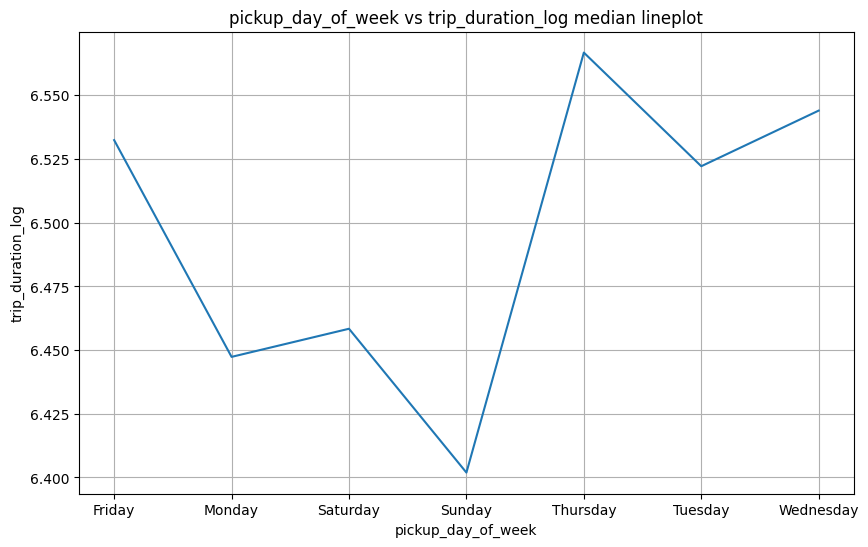

In [63]:
plt.figure(figsize=(10, 6))
plt.title("pickup_day_of_week vs trip_duration_log median lineplot")
plt.grid()
sns.lineplot(
    taxi_data.groupby("pickup_day_of_week")["trip_duration_log"].agg("median"),
);

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

**ОТВЕТЫ**:

A. Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов.

B. Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня.

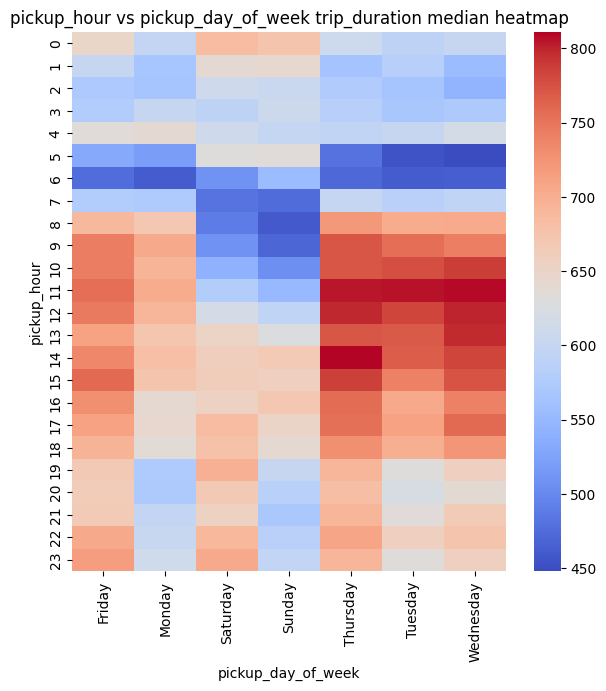

In [64]:
plt.figure(figsize=(7, 7))
plt.title("pickup_hour vs pickup_day_of_week trip_duration median heatmap")
sns.heatmap(
    pd.pivot_table(
        data=taxi_data,
        index="pickup_hour",
        columns="pickup_day_of_week",
        values="trip_duration",
        aggfunc="median"
    ),
    cmap="coolwarm"
);

In [65]:
pd.pivot_table(
    data=taxi_data,
    index="pickup_hour",
    columns="pickup_day_of_week",
    values="trip_duration",
    aggfunc="median"
).astype(int).style.background_gradient(cmap="coolwarm")

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


**ОТВЕТ**: За границы попало 2 кластера и также видны некоторые точки с из Нью-Йоркских кластеров. 

Некоторые выводы: Во-первых, это очень красиво. По сути мы можем видеть целую карту города, включающую ключевые районы НЙ. Самый плотный район - Манхэттен, но оно и понятно, деловой центр, все дела. Очень отчетливо видны аэропорты, причем для них на картах посадки и высадки видим несколько разные пути. Во-вторых, карты посадки и высадки тоже в отличаются, на карте высадки больше задействованы условно "спальные" районы города, тогда как на посадке в основном задействованы Манхеттен и ключевые магистрали. В-третьих, еще раз, это очень красиво, я под большим впечатлением от этой визуализации :) В-четвертых, кластеризация получилась не совсем по районам, но в целом тоже ключевые куски выделяются. Круто!

In [66]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

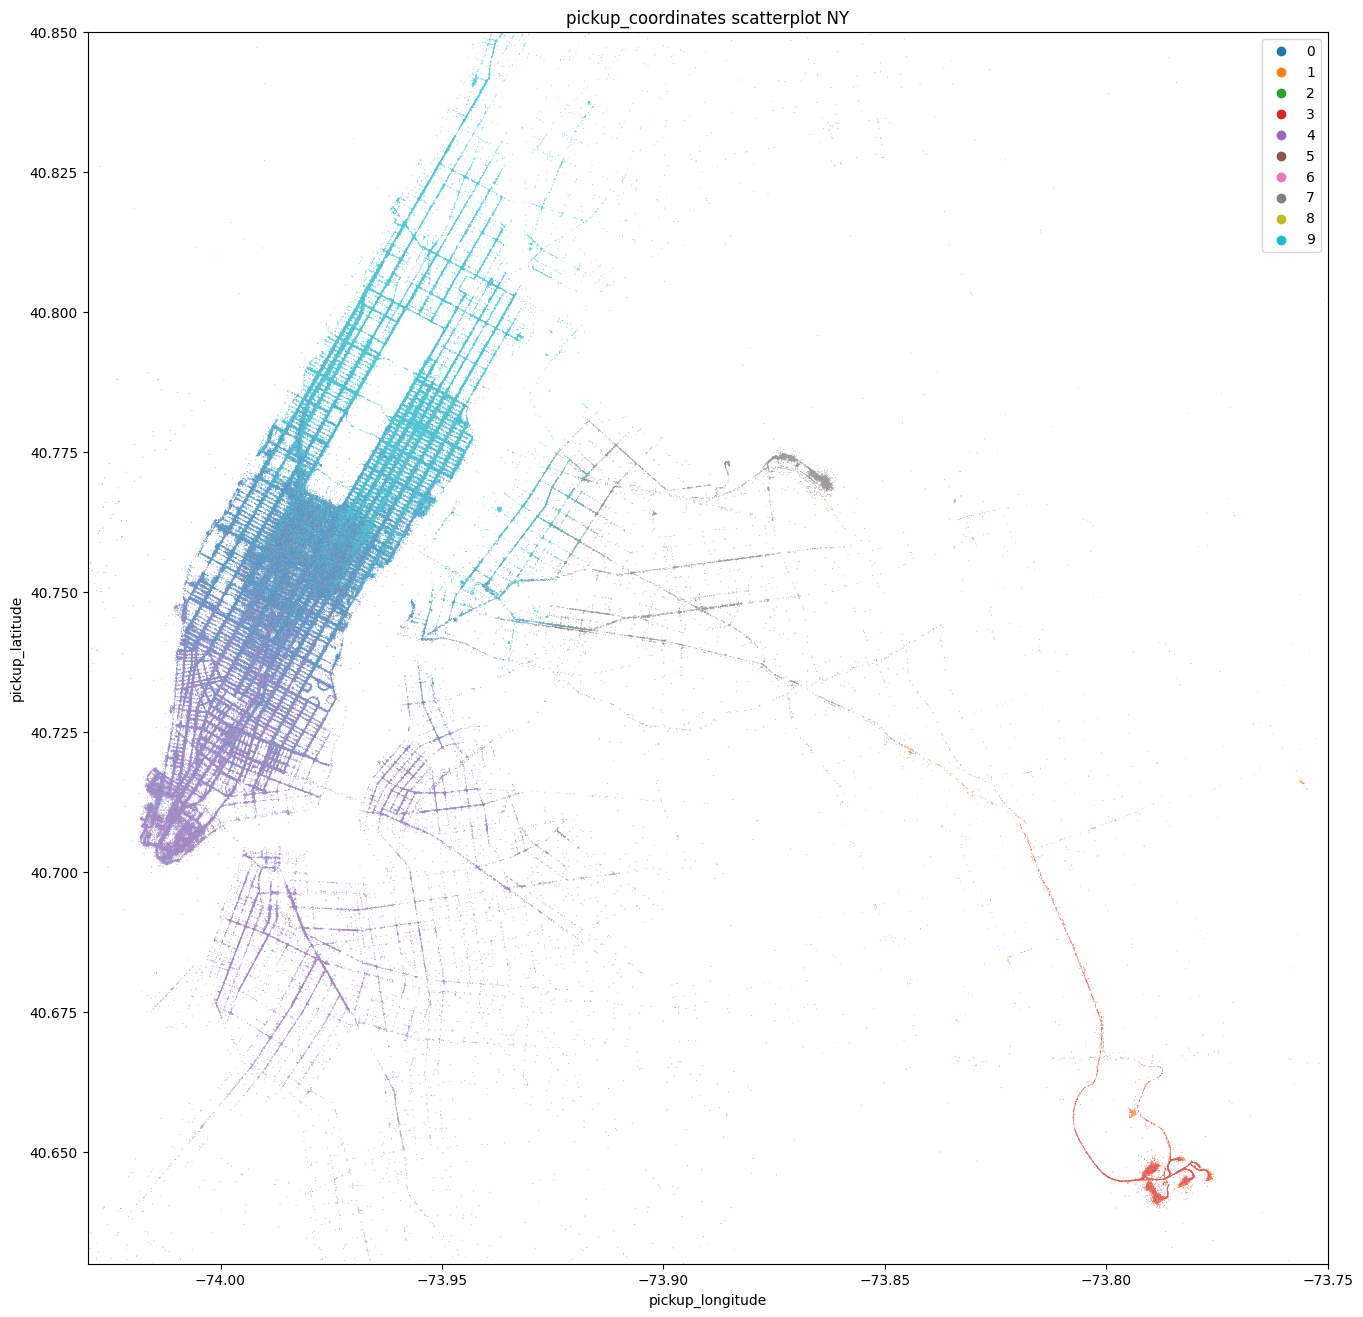

In [67]:
# ваш код здесь
plt.figure(figsize=(16, 16))
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.title("pickup_coordinates scatterplot NY")
sns.scatterplot(
    data=taxi_data,
    x="pickup_longitude",
    y="pickup_latitude",
    hue="geo_cluster",
    palette="tab10",
    s=0.3,
)
plt.legend(loc='upper right');

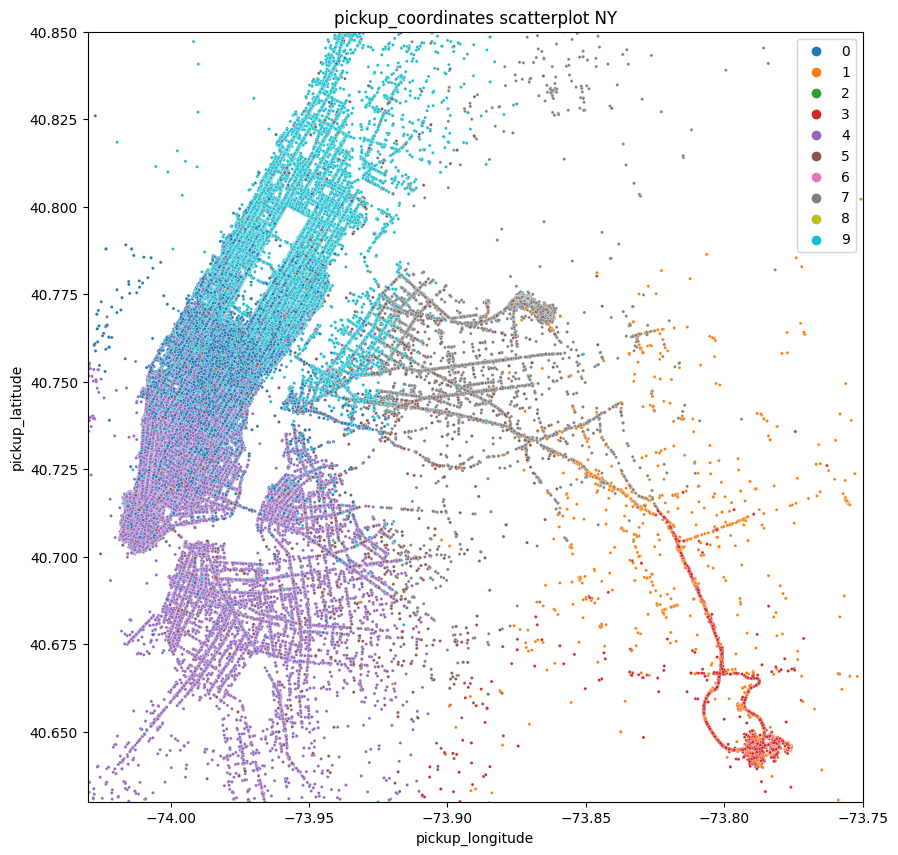

In [68]:
plt.figure(figsize=(10, 10))
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.title("pickup_coordinates scatterplot NY")
sns.scatterplot(
    data=taxi_data,
    x="pickup_longitude",
    y="pickup_latitude",
    hue="geo_cluster",
    palette="tab10",
    s=5,
)
plt.legend(loc='upper right');

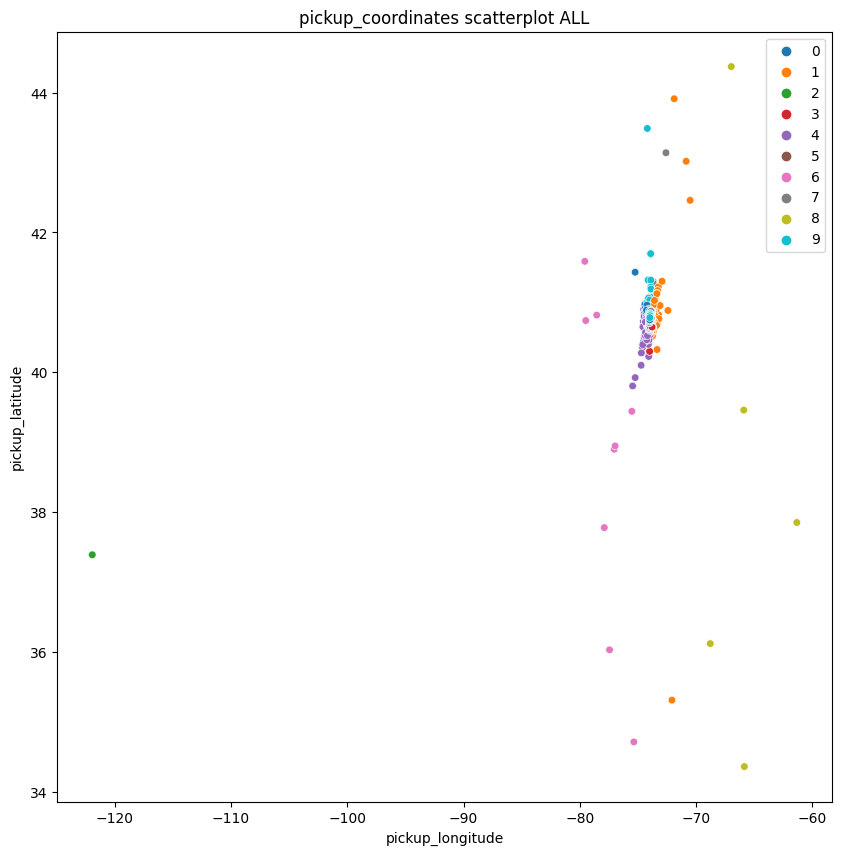

In [69]:
plt.figure(figsize=(10, 10))
plt.title("pickup_coordinates scatterplot ALL")
sns.scatterplot(
    data=taxi_data,
    x="pickup_longitude",
    y="pickup_latitude",
    hue="geo_cluster",
    palette="tab10",
    s=30,
)
plt.legend(loc='upper right');

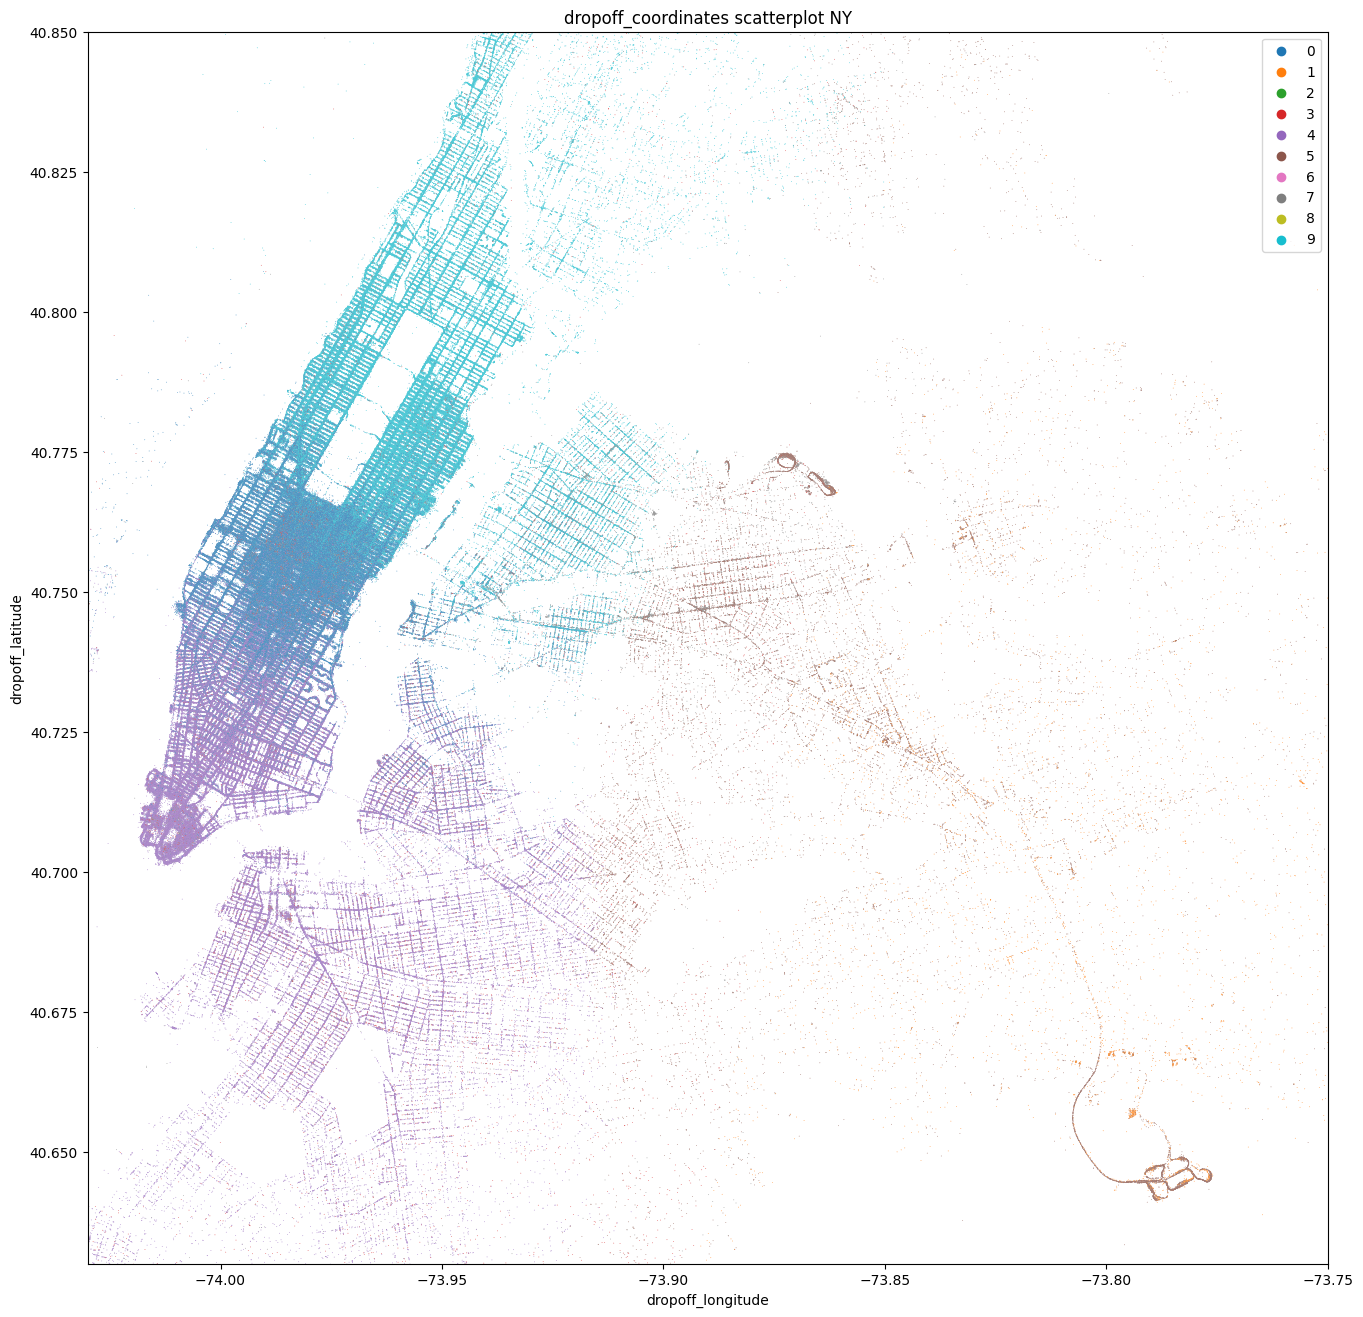

In [70]:
plt.figure(figsize=(16, 16))
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.title("dropoff_coordinates scatterplot NY")
sns.scatterplot(
    data=taxi_data,
    x="dropoff_longitude",
    y="dropoff_latitude",
    hue="geo_cluster",
    palette="tab10",
    s=0.3,
)
plt.legend(loc='upper right');

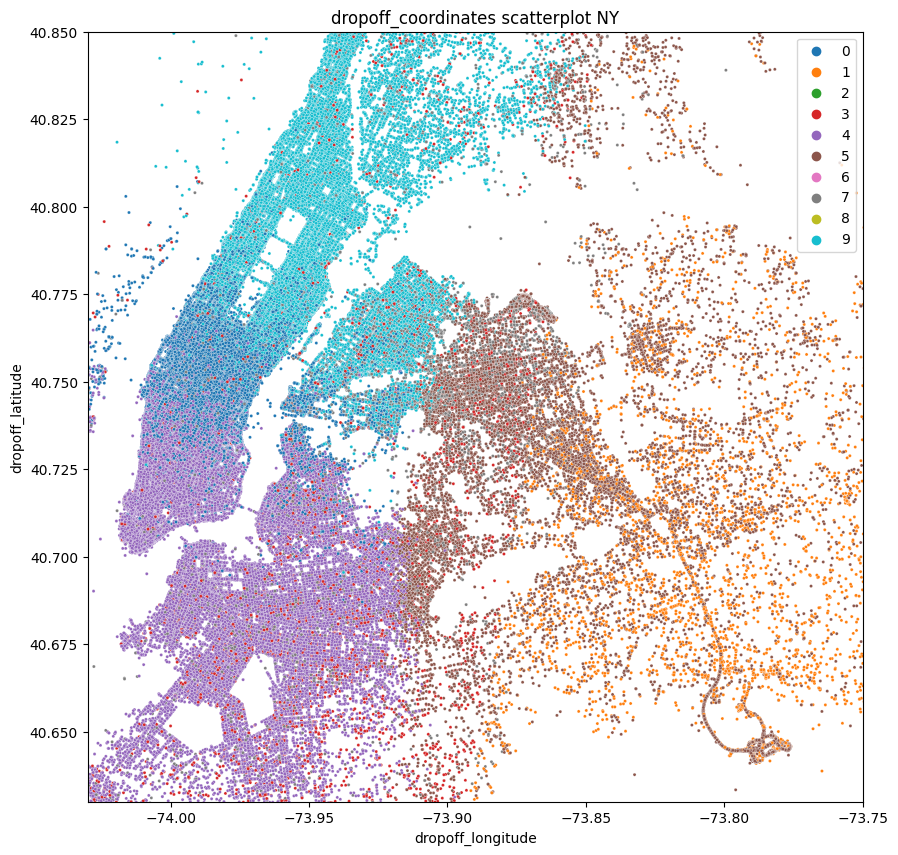

In [71]:
plt.figure(figsize=(10, 10))
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.title("dropoff_coordinates scatterplot NY")
sns.scatterplot(
    data=taxi_data,
    x="dropoff_longitude",
    y="dropoff_latitude",
    hue="geo_cluster",
    palette="tab10",
    s=5,
)
plt.legend(loc='upper right');

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [72]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 28)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'avg_speed', 'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [73]:
train_data = taxi_data.copy()
train_data.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_date  \
0         40.765602                  N            455  2016-03-14   
1         40.731152                  N            663  2016-06-12   
2         40.710087                  N           2124  2016-01-19   
3         40.706718                  N            429  2016-04-06   
4         40.782520                  N            435  2016-03-26   

   pickup_hour pickup_day_of_week  pickup_holiday  total_distance  \
0           17             Monday               0          2009.1   
1            0             Sunday               0          2513.2   
2           11            Tuesday               0         11060.8   
3           19          Wednesday               0          1779.4   
4           13           Saturday               0          1614.9   

   total_travel_time  number_of_steps  haversine_distance   direction  \
0              164.9              5.0            1.498521   99.970196   
1              332.0              6.0            1.805507 -117.153768   
2              767.6             16.0            6.385098 -159.680165   
3              235.8              4.0            1.485498 -172.737700   
4              140.1              5.0            1.188588  179.473585   

   geo_cluster  temperature  visibility  wind speed  precip events  avg_speed  \
0            9          4.4         8.0        27.8     0.3   None  15.896176   
1            4         28.9        16.1         7.4     0.0   None  13.646335   
2            4         -6.7        16.1        24.1     0.0   None  18.747119   
3            4          7.2        16.1        25.9     0.0   None  14.932028   
4            9          9.4        16.1         9.3     0.0   None  13.364690   

   trip_duration_log  
0           6.122493  
1           6.498282  
2           7.661527  
3           6.063785  
4           6.077642

### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [74]:
# ваш код здесь
drop_columns = ['id', 'dropoff_datetime', 'avg_speed']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 25)


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [75]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых. **ОТВЕТ**: 0.53

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных. **ОТВЕТ**: 0.006



In [76]:
# ваш код здесь
train_data["vendor_id"] = train_data["vendor_id"].apply(
    lambda x: 0 if x == 1 else 1
)
train_data["store_and_fwd_flag"] = train_data["store_and_fwd_flag"].apply(
    lambda x: 0 if x == "N" else 1
)
train_data.head()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0          1                1        -73.982155        40.767937   
1          0                1        -73.980415        40.738564   
2          1                1        -73.979027        40.763939   
3          1                1        -74.010040        40.719971   
4          1                1        -73.973053        40.793209   

   dropoff_longitude  dropoff_latitude  store_and_fwd_flag  trip_duration  \
0         -73.964630         40.765602                   0            455   
1         -73.999481         40.731152                   0            663   
2         -74.005333         40.710087                   0           2124   
3         -74.012268         40.706718                   0            429   
4         -73.972923         40.782520                   0            435   

   pickup_hour pickup_day_of_week  pickup_holiday  total_distance  \
0           17             Monday               0          2009.1   
1            0             Sunday               0          2513.2   
2           11            Tuesday               0         11060.8   
3           19          Wednesday               0          1779.4   
4           13           Saturday               0          1614.9   

   total_travel_time  number_of_steps  haversine_distance   direction  \
0              164.9              5.0            1.498521   99.970196   
1              332.0              6.0            1.805507 -117.153768   
2              767.6             16.0            6.385098 -159.680165   
3              235.8              4.0            1.485498 -172.737700   
4              140.1              5.0            1.188588  179.473585   

   geo_cluster  temperature  visibility  wind speed  precip events  \
0            9          4.4         8.0        27.8     0.3   None   
1            4         28.9        16.1         7.4     0.0   None   
2            4         -6.7        16.1        24.1     0.0   None   
3            4          7.2        16.1        25.9     0.0   None   
4            9          9.4        16.1         9.3     0.0   None   

   trip_duration_log  
0           6.122493  
1           6.498282  
2           7.661527  
3           6.063785  
4           6.077642

In [77]:
round(train_data["vendor_id"].mean(), 2)

0.53

In [78]:
round(train_data["store_and_fwd_flag"].mean(), 3)

0.006

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [79]:
# ваш код здесь
ohe_enc = preprocessing.OneHotEncoder(
    drop='first', 
    handle_unknown='ignore'
)
columns_to_change = ["pickup_day_of_week", "geo_cluster", "events"]
ohe_df = train_data[columns_to_change]
ohe_enc.fit(ohe_df)
column_names = ohe_enc.get_feature_names_out()
print(f"Число OHE-признаков: {len(column_names)}")
data_onehot = ohe_enc.transform(ohe_df)
data_onehot = data_onehot.toarray()
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
data_onehot

Число OHE-признаков: 18


pickup_day_of_week_Monday  pickup_day_of_week_Saturday  \
0                              1.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          1.0   
...                            ...                          ...   
1458228                        0.0                          0.0   
1458229                        0.0                          0.0   
1458230                        0.0                          0.0   
1458231                        0.0                          0.0   
1458232                        0.0                          0.0   

         pickup_day_of_week_Sunday  pickup_day_of_week_Thursday  \
0                              0.0                          0.0   
1                              1.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...                          ...   
1458228                        0.0                          0.0   
1458229                        1.0                          0.0   
1458230                        0.0                          0.0   
1458231                        0.0                          0.0   
1458232                        0.0                          0.0   

         pickup_day_of_week_Tuesday  pickup_day_of_week_Wednesday  \
0                               0.0                           0.0   
1                               0.0                           0.0   
2                               1.0                           0.0   
3                               0.0                           1.0   
4                               0.0                           0.0   
...                             ...                           ...   
1458228                         0.0                           0.0   
1458229                         0.0                           0.0   
1458230                         0.0                           0.0   
1458231                         1.0                           0.0   
1458232                         1.0                           0.0   

         geo_cluster_1  geo_cluster_2  geo_cluster_3  geo_cluster_4  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            1.0   
2                  0.0            0.0            0.0            1.0   
3                  0.0            0.0            0.0            1.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
1458228            0.0            0.0            0.0            0.0   
1458229            0.0            0.0            0.0            0.0   
1458230            0.0            0.0            0.0            1.0   
1458231            0.0            0.0            0.0            0.0   
1458232            0.0            0.0            0.0            0.0   

         geo_cluster_5  geo_cluster_6  geo_cluster_7  geo_cluster_8  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
1458228            0.0            0.0            0.0            0.0   
1458229            0.0            0.0            0.0            0.0   
1458230            0.0            0.0            0.0            0.0   
1458231

Добавим полученную таблицу с закодированными признаками:

In [80]:
train_data = pd.concat(
    [
        train_data.reset_index(drop=True).drop(columns_to_change, axis=1), 
        data_onehot
    ], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [81]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [82]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, 
    y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [83]:
# ваш код здесь
f_regression = feature_selection.f_regression
feat_selection = feature_selection.SelectKBest(score_func=f_regression, k=25)
feat_selection_fit = feat_selection.fit(X_train, y_train_log)
final_columns = feat_selection_fit.get_feature_names_out()
print("Список финальных столбцов: ")
print(final_columns, end="\n\n")
print(f"Число финальных столбцов: {(len(final_columns))}")

Список финальных столбцов: 
['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_day_of_week_Monday'
 'pickup_day_of_week_Saturday' 'pickup_day_of_week_Sunday'
 'pickup_day_of_week_Thursday' 'pickup_day_of_week_Tuesday'
 'pickup_day_of_week_Wednesday' 'geo_cluster_1' 'geo_cluster_3'
 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']

Число финальных столбцов: 25


Используем только полезные признаки для тренировочной и валидационной выборок:

In [84]:
X_train = X_train[final_columns]
X_valid = X_valid[final_columns]

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых. **ОТВЕТ**: 0.54


In [85]:
# ваш код здесь
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = pd.DataFrame(min_max_scaler.transform(X_train), columns=final_columns)
X_valid = pd.DataFrame(min_max_scaler.transform(X_valid), columns=final_columns)

In [86]:
print(
    "Cреднее арифметическое для первого "
    f"предиктора = {round(X_valid.iloc[:, 0].mean(), 2)}"
)

Cреднее арифметическое для первого предиктора = 0.54


In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977016 entries, 0 to 977015
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   vendor_id                     977016 non-null  float64
 1   passenger_count               977016 non-null  float64
 2   pickup_longitude              977016 non-null  float64
 3   pickup_latitude               977016 non-null  float64
 4   dropoff_longitude             977016 non-null  float64
 5   dropoff_latitude              977016 non-null  float64
 6   store_and_fwd_flag            977016 non-null  float64
 7   pickup_hour                   977016 non-null  float64
 8   pickup_holiday                977016 non-null  float64
 9   total_distance                977016 non-null  float64
 10  total_travel_time             977016 non-null  float64
 11  number_of_steps               977016 non-null  float64
 12  haversine_distance            977016 non-nul

In [88]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481217 entries, 0 to 481216
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   vendor_id                     481217 non-null  float64
 1   passenger_count               481217 non-null  float64
 2   pickup_longitude              481217 non-null  float64
 3   pickup_latitude               481217 non-null  float64
 4   dropoff_longitude             481217 non-null  float64
 5   dropoff_latitude              481217 non-null  float64
 6   store_and_fwd_flag            481217 non-null  float64
 7   pickup_hour                   481217 non-null  float64
 8   pickup_holiday                481217 non-null  float64
 9   total_distance                481217 non-null  float64
 10  total_travel_time             481217 non-null  float64
 11  number_of_steps               481217 non-null  float64
 12  haversine_distance            481217 non-nul

Сохраним данные, чтобы оперативка не сгорела :) Далее для обучения моделек загрузим эти датасеты без выполнения большей части предыдущих ячеек.

In [89]:
X_train.to_csv(f"{PROCESSED_DATA_PATH}/X_train.csv", index=False)
X_valid.to_csv(f"{PROCESSED_DATA_PATH}/X_valid.csv", index=False)
np.save(f"{PROCESSED_DATA_PATH}/y_train_log", y_train_log)
np.save(f"{PROCESSED_DATA_PATH}/y_valid_log", y_valid_log)

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



Загрузим предподготовленные данные:

In [90]:
X_train = pd.read_csv(f"{PROCESSED_DATA_PATH}/X_train.csv")
X_valid = pd.read_csv(f"{PROCESSED_DATA_PATH}/X_valid.csv")
y_train_log = np.load(f"{PROCESSED_DATA_PATH}/y_train_log.npy")
y_valid_log = np.load(f"{PROCESSED_DATA_PATH}/y_valid_log.npy")

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977016 entries, 0 to 977015
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   vendor_id                     977016 non-null  float64
 1   passenger_count               977016 non-null  float64
 2   pickup_longitude              977016 non-null  float64
 3   pickup_latitude               977016 non-null  float64
 4   dropoff_longitude             977016 non-null  float64
 5   dropoff_latitude              977016 non-null  float64
 6   store_and_fwd_flag            977016 non-null  float64
 7   pickup_hour                   977016 non-null  float64
 8   total_distance                977016 non-null  float64
 9   total_travel_time             977016 non-null  float64
 10  number_of_steps               977016 non-null  float64
 11  haversine_distance            977016 non-null  float64
 12  temperature                   977016 non-nul

In [ ]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481217 entries, 0 to 481216
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   vendor_id                     481217 non-null  float64
 1   passenger_count               481217 non-null  float64
 2   pickup_longitude              481217 non-null  float64
 3   pickup_latitude               481217 non-null  float64
 4   dropoff_longitude             481217 non-null  float64
 5   dropoff_latitude              481217 non-null  float64
 6   store_and_fwd_flag            481217 non-null  float64
 7   pickup_hour                   481217 non-null  float64
 8   total_distance                481217 non-null  float64
 9   total_travel_time             481217 non-null  float64
 10  number_of_steps               481217 non-null  float64
 11  haversine_distance            481217 non-null  float64
 12  temperature                   481217 non-nul

In [ ]:
y_train_log.shape

(977016,)

In [ ]:
y_valid_log.shape

(481217,)

### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых. **ОТВЕТ**: train = 0.54, valid = 0.54


In [ ]:
# ваш код здесь
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train_log)

LinearRegression()

In [ ]:
y_train_predict = linear_reg.predict(X_train)
print("y_train_predict array:")
display(y_train_predict)

print()

y_valid_predict = linear_reg.predict(X_valid)
print("y_valid_predict array:")
display(y_valid_predict)

y_train_predict array:


array([5.948614  , 6.15270849, 6.04082734, ..., 6.34887647, 5.90824403,
       6.11918114])


y_valid_predict array:


array([5.88831961, 5.84934388, 5.5116627 , ..., 6.4478121 , 6.40885034,
       6.02600893])

In [ ]:
print("RMSLE train = ", end="")
round(
    metrics.mean_squared_error(
        y_train_log, 
        y_train_predict, 
        squared=False
    ), 
    2
)

RMSLE train = 

0.54

In [ ]:
print("RMSLE valid = ", end="")
round(
    metrics.mean_squared_error(
        y_valid_log, 
        y_valid_predict, 
        squared=False
    ), 
    2
)

RMSLE valid = 

0.54

### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых. **ОТВЕТ**: train = 0.47, valid = 0.7

б) Наблюдаются ли у вашей модели признаки переобучения? **ОТВЕТ**: Да


In [ ]:
# ваш код здесь
poly_features = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_valid_poly = poly_features.fit_transform(X_valid)

In [ ]:
linear_reg_poly = linear_model.LinearRegression()
linear_reg_poly.fit(X_train_poly, y_train_log)

LinearRegression()

In [ ]:
y_train_poly_predict = linear_reg_poly.predict(X_train_poly)
print("y_train_poly_predict array:")
display(y_train_poly_predict)

print()

y_valid_poly_predict = linear_reg_poly.predict(X_valid_poly)
print("y_valid_poly_predict array:")
display(y_valid_poly_predict)

y_train_poly_predict array:


array([5.71057103, 6.15307591, 6.0992429 , ..., 6.00927708, 5.81242206,
       6.25799535])


y_valid_poly_predict array:


array([5.8011472 , 5.36498997, 4.69580052, ..., 6.21598553, 6.64591674,
       6.12747166])

In [ ]:
print("RMSLE train_poly = ", end="")
round(
    metrics.mean_squared_error(
        y_train_log, 
        y_train_poly_predict, 
        squared=False
    ), 
    2
)

RMSLE train_poly = 

0.47

In [ ]:
print("RMSLE valid_poly = ", end="")
round(
    metrics.mean_squared_error(
        y_valid_log, 
        y_valid_poly_predict, 
        squared=False
    ), 
    2
)

RMSLE valid_poly = 

0.7

In [ ]:
print("RMSLE train_poly = ", end="")
round(
    metrics.mean_squared_error(
        y_train_log, 
        y_train_poly_predict, 
        squared=False
    ), 
    2
)

RMSLE train_poly = 

0.47

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых. **ОТВЕТ**: train = 0.48, valid = 0.48


In [ ]:
# ваш код здесь
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X_train_poly, y_train_log)

Ridge(alpha=1)

In [ ]:
y_train_ridge_predict = ridge.predict(X_train_poly)
print("y_train_ridge_predict array:")
display(y_train_ridge_predict)

print()

y_valid_ridge_predict = ridge.predict(X_valid_poly)
print("y_valid_ridge_predict array:")
display(y_valid_ridge_predict)

y_train_ridge_predict array:


array([5.71432015, 6.22099486, 6.12355118, ..., 6.14501414, 5.75478292,
       6.20261961])


y_valid_ridge_predict array:


array([5.80232929, 5.42032048, 4.79760303, ..., 6.21550763, 6.57224824,
       6.08611071])

In [ ]:
print("RMSLE train_ridge = ", end="")
round(
    metrics.mean_squared_error(
        y_train_log, 
        y_train_ridge_predict, 
        squared=False
    ), 
    2
)

RMSLE train_ridge = 

0.48

In [ ]:
print("RMSLE valid_ridge = ", end="")
round(
    metrics.mean_squared_error(
        y_valid_log, 
        y_valid_ridge_predict, 
        squared=False
    ), 
    2
)

RMSLE valid_ridge = 

0.48

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых. **ОТВЕТ**: train = 0, valid = 0.57

б) Наблюдаются ли у вашей модели признаки переобучения? **ОТВЕТ**: да


In [ ]:
# ваш код здесь
DT_reg = tree.DecisionTreeRegressor()
DT_reg.fit(X_train, y_train_log)

DecisionTreeRegressor()

In [ ]:
y_train_DT_predict = DT_reg.predict(X_train)
print("y_train_DT_predict array:")
display(y_train_DT_predict)

print()

y_valid_DT_predict = DT_reg.predict(X_valid)
print("y_valid_DT_predict array:")
display(y_valid_DT_predict)

y_train_DT_predict array:


array([6.2441669 , 6.03308622, 5.56068163, ..., 5.97635091, 5.12989871,
       6.3851944 ])


y_valid_DT_predict array:


array([5.50533154, 5.81711116, 5.92157842, ..., 6.58617165, 6.58063914,
       6.19440539])

In [ ]:
print("RMSLE train_DT = ", end="")
round(
    metrics.mean_squared_error(
        y_train_log, 
        y_train_DT_predict, 
        squared=False
    ), 
    2
)

RMSLE train_DT = 

0.0

In [ ]:
print("RMSLE valid_DT = ", end="")
round(
    metrics.mean_squared_error(
        y_valid_log, 
        y_valid_DT_predict, 
        squared=False
    ), 
    2
)

RMSLE valid_DT = 

0.57

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать). **ОТВЕТ**: 12

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых. **ОТВЕТ**: train = 0.41, valid = 0.43


In [ ]:
# ваш код здесь
max_depths = range(7, 20)
train_rmlse_list = []
valid_rmlse_list = []

for max_depth in max_depths:
    DT_reg = tree.DecisionTreeRegressor(max_depth=max_depth)
    DT_reg.fit(X_train, y_train_log)
    y_train_DT_predict = DT_reg.predict(X_train)
    y_valid_DT_predict = DT_reg.predict(X_valid)
    rmsle_DT_reg_train = metrics.mean_squared_error(
        y_train_log,
        y_train_DT_predict,
        squared=False
    )
    rmsle_DT_reg_valid = metrics.mean_squared_error(
        y_valid_log,
        y_valid_DT_predict,
        squared=False
    )
    train_rmlse_list.append(rmsle_DT_reg_train)
    valid_rmlse_list.append(rmsle_DT_reg_valid)

In [ ]:
train_rmlse_list

[0.44482308853369923,
 0.43705694243938786,
 0.4299932930108072,
 0.42253336638321753,
 0.41467601682006766,
 0.4059937973828759,
 0.3957798812066926,
 0.38401898343793506,
 0.37076761133403746,
 0.35609310600351896,
 0.3399352293590421,
 0.3229252499247375,
 0.30464958877769954]

In [ ]:
valid_rmlse_list

[0.4471401404677147,
 0.44076482552491514,
 0.43594373706497624,
 0.4318797717117099,
 0.4303344773276741,
 0.43047942280660756,
 0.4336654060036187,
 0.43837939334448756,
 0.44668628904676777,
 0.454321751481052,
 0.46189147075199627,
 0.47369456288132344,
 0.4844154601456133]

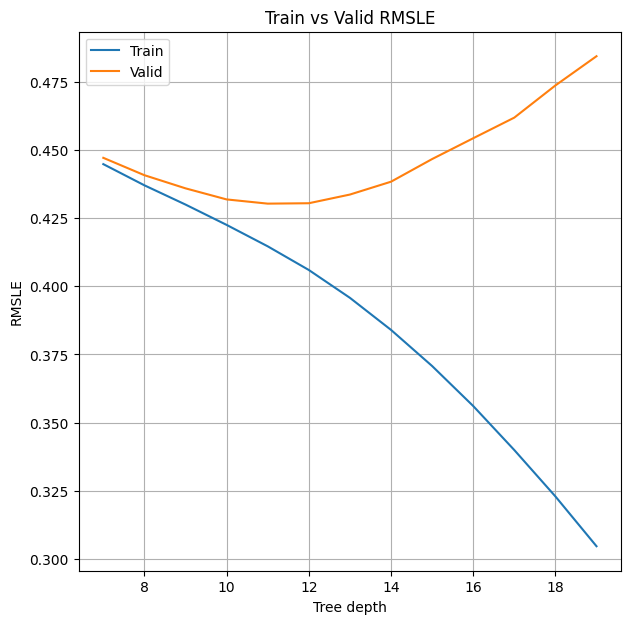

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlabel("Tree depth")
ax.set_ylabel("RMSLE")
ax.set_title("Train vs Valid RMSLE")
ax.grid()
sns.lineplot(
    x=max_depths,
    y=train_rmlse_list,
    label="Train"
)
sns.lineplot(
    x=max_depths,
    y=valid_rmlse_list,
    label="Valid"
);

Видим, что на валидационной выборке лучше всего работает глубина 12. Построим модель с таким гиперпараметром:

In [ ]:
DT_reg = tree.DecisionTreeRegressor(max_depth=12)
DT_reg.fit(X_train, y_train_log)

y_train_DT_predict = DT_reg.predict(X_train)
y_valid_DT_predict = DT_reg.predict(X_valid)

In [ ]:
print("RMSLE train_DT = ", end="")
round(
    metrics.mean_squared_error(
        y_train_log, 
        y_train_DT_predict, 
        squared=False
    ), 
    2
)

RMSLE train_DT = 

0.41

In [ ]:
print("RMSLE valid_DT = ", end="")
round(
    metrics.mean_squared_error(
        y_valid_log, 
        y_valid_DT_predict, 
        squared=False
    ), 
    2
)

RMSLE valid_DT = 

0.43

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых. **ОТВЕТ**: train = 0.40, valid = 0.41


In [ ]:
# ваш код здесь
RF_reg = ensemble.RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42,
    verbose=True,
    # n_jobs=-1
)
RF_reg.fit(X_train, y_train_log)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 40.3min finished


RandomForestRegressor(max_depth=12, min_samples_split=20, n_estimators=200,
                      random_state=42, verbose=True)

40 минут обучался случайный лес... За это время я успел сходить в душ, встретить свою девушку с работы, посмотреть ютаб и подумать о том, как войти в айти :)

In [ ]:
y_train_RF_predict = RF_reg.predict(X_train)
y_valid_RF_predict = RF_reg.predict(X_valid)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   30.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   15.0s finished


In [ ]:
print("RMSLE train_RF = ", end="")
round(
    metrics.mean_squared_error(
        y_train_log, 
        y_train_RF_predict, 
        squared=False
    ), 
    2
)

RMSLE train_RF = 

0.4

In [ ]:
print("RMSLE valid_RF = ", end="")
round(
    metrics.mean_squared_error(
        y_valid_log, 
        y_valid_RF_predict, 
        squared=False
    ), 
    2
)

RMSLE valid_RF = 

0.41

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых. **ОТВЕТ**: train = 0.37, valid = 0.39


In [ ]:
# ваш код здесь
GB_reg = ensemble.GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42,
    verbose=True,
)
GB_reg.fit(X_train, y_train_log)

      Iter       Train Loss   Remaining Time 
         1           0.3110           23.41m
         2           0.2247           19.94m
         3           0.1987           18.25m
         4           0.1876           17.94m
         5           0.1823           17.52m
         6           0.1778           17.24m
         7           0.1751           16.74m
         8           0.1721           16.47m
         9           0.1708           16.22m
        10           0.1693           16.13m
        20           0.1601           13.87m
        30           0.1539           12.12m
        40           0.1502           10.32m
        50           0.1477            8.55m
        60           0.1456            6.82m
        70           0.1436            5.09m
        80           0.1414            3.38m
        90           0.1396            1.68m
       100           0.1380            0.00s


GradientBoostingRegressor(learning_rate=0.5, max_depth=6, min_samples_split=30,
                          random_state=42, verbose=True)

In [ ]:
y_train_GB_predict = GB_reg.predict(X_train)
y_valid_GB_predict = GB_reg.predict(X_valid)

In [ ]:
print("RMSLE train_GB = ", end="")
round(
    metrics.mean_squared_error(
        y_train_log, 
        y_train_GB_predict, 
        squared=False
    ), 
    2
)

RMSLE train_GB = 

0.37

In [ ]:
print("RMSLE valid_GB = ", end="")
round(
    metrics.mean_squared_error(
        y_valid_log, 
        y_valid_GB_predict, 
        squared=False
    ), 
    2
)

RMSLE valid_GB = 

0.39

### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* **Градиентный бустинг над деревьями решений**


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


**ОТВЕТ**:
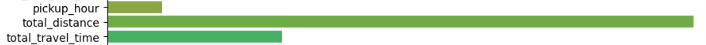

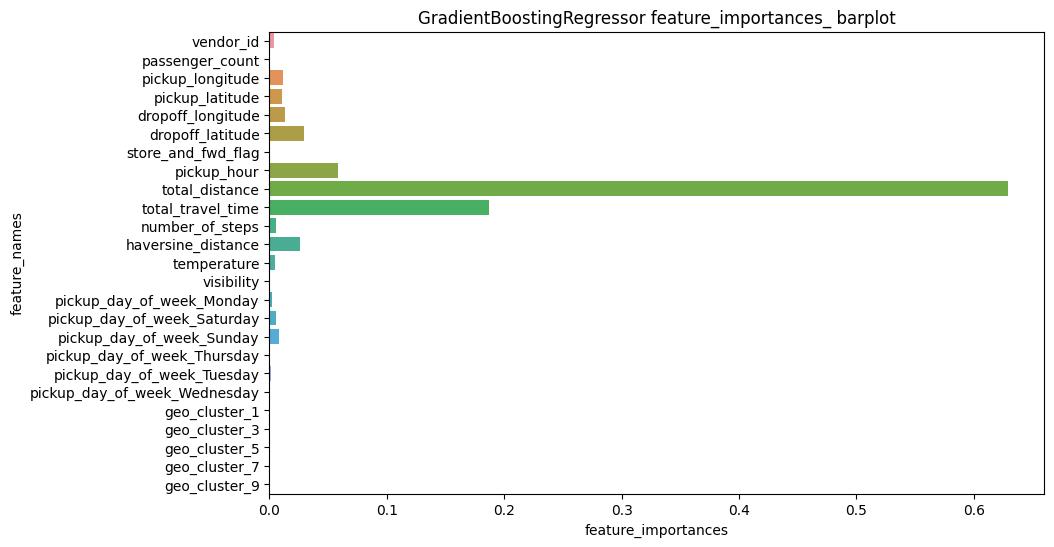

In [ ]:
# ваш код здесь
plt.figure(figsize=(10, 6))
plt.title("GradientBoostingRegressor feature_importances_ barplot")
plt.xlabel("feature_importances")
plt.ylabel("feature_names")
sns.barplot(
    y=GB_reg.feature_names_in_,
    x=GB_reg.feature_importances_
);


### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых. **ОТВЕТ**: MeAE GB_reg = 1.8 minutes


In [ ]:
# ваш код здесь
y_true = np.exp(y_train_log) - 1
y_pred = np.exp(y_train_GB_predict) - 1
MeAE = metrics.median_absolute_error(
    y_true,
    y_pred
)
MeAE_minutes = round(MeAE / 60, 1)
print(f"MeAE GB_reg = {MeAE_minutes} minutes")

MeAE GB_reg = 1.8 minutes


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [73]:
test_data = pd.read_csv(f"{DATA_PATH}/test.csv")
osrm_data_test = pd.read_csv(f"{DATA_PATH}/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [74]:
test_data['pickup_datetime']=pd.to_datetime(
    test_data['pickup_datetime'],
    format='%Y-%m-%d %H:%M:%S'
)
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(
    lambda x: 0 if x == 1 else 1
)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(
    lambda x: 0 if x == 'N' else 1
)
test_data_onehot = ohe_enc.fit_transform(
    test_data[columns_to_change]
).toarray()
column_names = ohe_enc.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [
        test_data.reset_index(drop=True).drop(columns_to_change, axis=1), 
        test_data_onehot
    ], 
    axis=1
)
X_test = test_data[final_columns]
X_test_scaled = min_max_scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


In [75]:
X_test

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0               0                1        -73.988129        40.732029   
1               0                1        -73.964203        40.679993   
2               0                1        -73.997437        40.737583   
3               1                1        -73.956070        40.771900   
4               0                1        -73.970215        40.761475   
...           ...              ...               ...              ...   
625129          0                1        -74.003464        40.725105   
625130          0                1        -74.006363        40.743782   
625131          0                2        -73.972267        40.759865   
625132          0                1        -73.976501        40.733562   
625133          1                2        -73.981850        40.716881   

        dropoff_longitude  dropoff_latitude  store_and_fwd_flag  pickup_hour  \
0              -73.990173         40.756680                   0           23   
1              -73.959808         40.655403                   0           23   
2              -73.986160         40.729523                   0           23   
3              -73.986427         40.730469                   0           23   
4              -73.961510         40.755890                   0           23   
...                   ...               ...                 ...          ...   
625129         -74.001251         40.733643                   0            0   
625130         -73.953407         40.782467                   0            0   
625131         -73.876602         40.748665                   0            0   
625132         -73.854263         40.891788                   0            0   
625133         -73.969330         40.769379                   0            0   

        total_distance  total_travel_time  number_of_steps  \
0               3795.9              424.6                4   
1               2904.5              200.0                4   
2               1499.5              193.2                4   
3               7023.9              494.8               11   
4               1108.2              103.2                4   
...                ...                ...              ...   
625129          1166.3              165.4                7   
625130          9572.1              676.1               10   
625131          9492.3              687.0               13   
625132         23770.1             1295.1               21   
625133          8270.7              611.8               13   

        haversine_distance  temperature  visibility  \
0                 2.746426         24.4        16.1   
1                 2.759239         24.4        16.1   
2                 1.306155         24.4        16.1   
3                 5.269088         24.4        16.1   
4                 0.960842         24.4        16.1   
...                    ...          ...         ...   
625129            0.967438          5.6        16.1   
625130            6.196343          5.6        16.1   
625131            8.153719          5.6        16.1   
625132           20.380748          5.6        16.1   
625133            5.932019          5.6        16.1   

        pickup_day_of_week_Monday  pickup_day_of_week_Saturday  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   
...                           ...                          ...   
625129                        0.0                          0.0   
625130                        0.0                          0.0   
625131                        0.0                          0.0   
625132                        0.0                          0.0   
625133                        0.0     

In [76]:
X_test_scaled

array([[0.        , 0.14285714, 0.79120333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14285714, 0.79159816, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14285714, 0.79104973, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.28571429, 0.79146508, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.14285714, 0.7913952 , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.28571429, 0.79130695, ..., 0.        , 0.        ,
        0.        ]])

Сохраним обработанные тестовые данные:

In [77]:
X_test.to_csv(f"{PROCESSED_DATA_PATH}/X_test.csv", index=False)
np.save(f"{PROCESSED_DATA_PATH}/X_test_scaled", X_test_scaled)

Для удобства работы с тестовыми данными не будем выполнять все ячейки выше (пощадим вычислительные мощности), выполним только необходимые и загрузим тестовые данные с диска:

In [ ]:
X_test = pd.read_csv(f"{PROCESSED_DATA_PATH}/X_test.csv")
X_test_scaled = np.load(f"{PROCESSED_DATA_PATH}/X_test_scaled.npy")

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.


In [80]:
X_test_df = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)
X_test_df

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0             0.0         0.142857          0.791203         0.636454   
1             0.0         0.142857          0.791598         0.631256   
2             0.0         0.142857          0.791050         0.637009   
3             1.0         0.142857          0.791732         0.640436   
4             0.0         0.142857          0.791499         0.639395   
...           ...              ...               ...              ...   
625129        0.0         0.142857          0.790950         0.635762   
625130        0.0         0.142857          0.790902         0.637628   
625131        0.0         0.285714          0.791465         0.639234   
625132        0.0         0.142857          0.791395         0.636607   
625133        1.0         0.285714          0.791307         0.634941   

        dropoff_longitude  dropoff_latitude  store_and_fwd_flag  pickup_hour  \
0                0.791169          0.731039                 0.0          1.0   
1                0.791671          0.722405                 0.0          1.0   
2                0.791236          0.728724                 0.0          1.0   
3                0.791231          0.728804                 0.0          1.0   
4                0.791642          0.730971                 0.0          1.0   
...                   ...               ...                 ...          ...   
625129           0.790987          0.729075                 0.0          0.0   
625130           0.791776          0.733237                 0.0          0.0   
625131           0.793044          0.730356                 0.0          0.0   
625132           0.793412          0.742556                 0.0          0.0   
625133           0.791513          0.732121                 0.0          0.0   

        total_distance  total_travel_time  number_of_steps  \
0             0.043147           0.093948         0.045455   
1             0.033015           0.044253         0.045455   
2             0.017044           0.042748         0.045455   
3             0.079839           0.109481         0.204545   
4             0.012597           0.022834         0.045455   
...                ...                ...              ...   
625129        0.013257           0.036597         0.113636   
625130        0.108804           0.149596         0.181818   
625131        0.107897           0.152008         0.250000   
625132        0.270189           0.286558         0.431818   
625133        0.094011           0.135369         0.250000   

        haversine_distance  temperature  visibility  \
0                 0.004885     0.845545         1.0   
1                 0.004908     0.845545         1.0   
2                 0.002323     0.845545         1.0   
3                 0.009372     0.845545         1.0   
4                 0.001709     0.845545         1.0   
...                    ...          ...         ...   
625129            0.001721     0.473267         1.0   
625130            0.011021     0.473267         1.0   
625131            0.014502     0.473267         1.0   
625132            0.036250     0.473267         1.0   
625133            0.010551     0.473267         1.0   

        pickup_day_of_week_Monday  pickup_day_of_week_Saturday  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   
...                           ...                          ...   
625129                        0.0                          0.0   
625130                        0.0                          0.0   
625131                        0.0                          0.0   
625132                        0.0                          0.0   
625133                        0.0     

In [78]:
# ваш код здесь
GB_reg = ensemble.GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42,
    verbose=True,
)
GB_reg.fit(X_train, y_train_log)

      Iter       Train Loss   Remaining Time 
         1           0.3110           13.43m
         2           0.2247           13.71m
         3           0.1987           13.84m
         4           0.1876           13.71m
         5           0.1823           13.57m
         6           0.1778           13.45m
         7           0.1751           13.36m
         8           0.1721           13.11m
         9           0.1708           12.97m
        10           0.1693           12.81m
        20           0.1601           11.27m
        30           0.1539            9.78m
        40           0.1502            8.35m
        50           0.1477            6.91m
        60           0.1456            5.51m
        70           0.1436            4.13m
        80           0.1414            2.75m
        90           0.1396            1.37m
       100           0.1380            0.00s


GradientBoostingRegressor(learning_rate=0.5, max_depth=6, min_samples_split=30,
                          random_state=42, verbose=True)

In [81]:
y_test_predict_log = GB_reg.predict(X_test_df)

In [82]:
y_test_predict = np.exp(y_test_predict_log) - 1
y_test_predict

array([ 836.07802589,  589.95110449,  390.52114856, ..., 1567.61392575,
       2147.36283452, 1123.94931928])

Код для создания submission-файла:

In [83]:
# ваш код здесь
submission = pd.DataFrame({"id": test_id, "trip_duration": y_test_predict})
submission.to_csv(f"{DATA_PATH}/submission_gb.csv", index=False)

Результат работы модели:

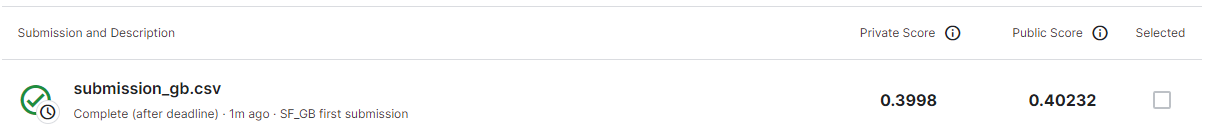

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [84]:
!pip install xgboost --quiet

После чего модуль можно импортировать:

In [85]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [88]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(
    X_train.values, 
    label=y_train_log, 
    feature_names=final_columns
)

dvalid = xgb.DMatrix(
    X_valid.values, 
    label=y_valid_log, 
    feature_names=final_columns
)

dtest = xgb.DMatrix(
    X_test_scaled, 
    feature_names=final_columns
)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [90]:
# Гиперпараметры модели
xgb_pars = {
    "min_child_weight": 20, 
    "eta": 0.1, 
    "colsample_bytree": 0.9, 
    "max_depth": 6, 
    "subsample": 0.9, 
    "lambda": 1, 
    "nthread": -1, 
    "booster": "gbtree", 
    "eval_metric": "rmse", 
    "objective": "reg:squarederror"
}
# Тренировочная и валидационная выборка
watchlist = [(dtrain, "train"), (dvalid, "valid")]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars,            # гиперпараметры модели
    dtrain=dtrain,              # обучающая выборка
    num_boost_round=300,        # количество моделей в ансамбле
    evals=watchlist,            # выборки, на которых считается матрица
    early_stopping_rounds=20,   # раняя остановка
    maximize=False,             # смена поиска максимума на минимум
    verbose_eval=10             # шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42222	valid-rmse:5.42195
[10]	train-rmse:1.93567	valid-rmse:1.93564
[20]	train-rmse:0.78538	valid-rmse:0.78629
[30]	train-rmse:0.47938	valid-rmse:0.48145
[40]	train-rmse:0.42153	valid-rmse:0.42430
[50]	train-rmse:0.40923	valid-rmse:0.41247
[60]	train-rmse:0.40476	valid-rmse:0.40849
[70]	train-rmse:0.40155	valid-rmse:0.40566
[80]	train-rmse:0.39877	valid-rmse:0.40315
[90]	train-rmse:0.39727	valid-rmse:0.40200
[100]	train-rmse:0.39544	valid-rmse:0.40044
[110]	train-rmse:0.39381	valid-rmse:0.39916
[120]	train-rmse:0.39287	valid-rmse:0.39843
[130]	train-rmse:0.39155	valid-rmse:0.39743
[140]	train-rmse:0.39064	valid-rmse:0.39694
[150]	train-rmse:0.38953	valid-rmse:0.39615
[160]	train-rmse:0.38890	valid-rmse:0.39575
[170]	train-rmse:0.38832	valid-rmse:0.39532
[180]	train-rmse:0.38771	valid-rmse:0.39502
[190]	train-rmse:0.38717	valid-rmse:0.39485
[200]	train-rmse:0.38645	valid-rmse:0.39442
[210]	train-rmse:0.38567	valid-rmse:0.39406
[220]	train-rmse:0.38477	valid-rmse:0.39360

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [91]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39180


In [92]:
# ваш код здесь
submission = pd.DataFrame({"id": test_id, "trip_duration": y_test_predict})
submission.to_csv(f"{DATA_PATH}/submission_xgb.csv", index=False)

Результаты на Kaggle:

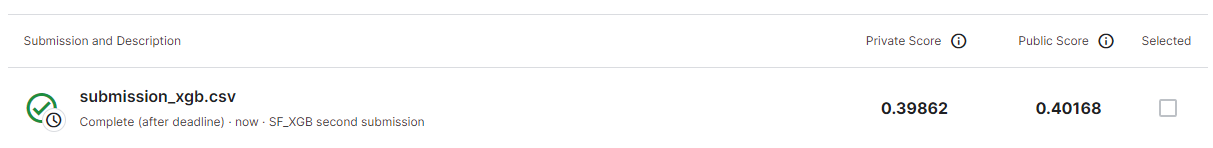

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


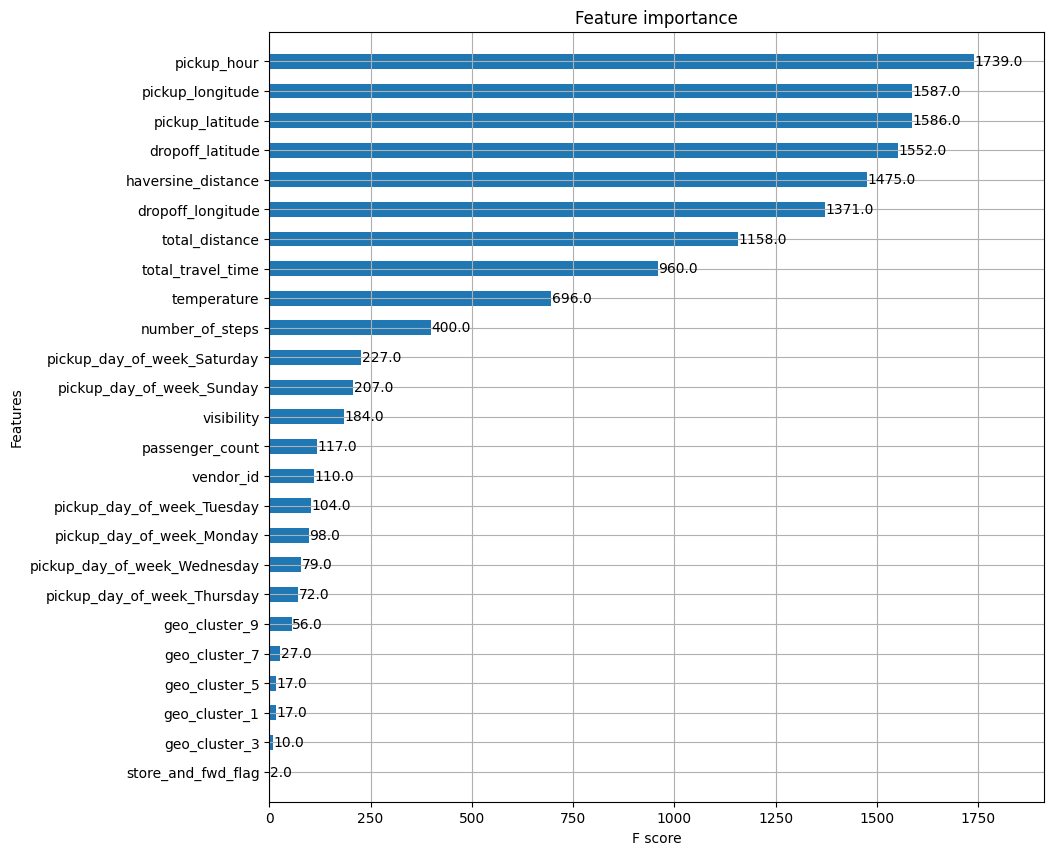

In [95]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, ax=ax, height=0.5);